# Calculate velocity potential for Huang et al., 2017 model (H model)

## 1. Load modules

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [2]:
from windspharm.xarray import VectorWind
from windspharm.examples import example_data_path

In [3]:
years = np.arange(1980, 2015)
nyr = len(years)

## 2. Read model data, calculate velocity potential, and save the results

In [4]:
idir = '/projects/COLA/CLIM751/data/daily/'
odir = '/scratch/jjung45/mjo/vp200/'

In [5]:
n = 0
for year in years:
    u_path = idir+'u200/'+f'u200_daily_{year}01.nc'
    v_path = idir+'v200/'+f'v200_daily_{year}01.nc'
    
    ds_u = xr.open_dataset(u_path)
    ds_v = xr.open_dataset(v_path)
    
    u = ds_u['u200'].sel(ens=1)
    v = ds_v['v200'].sel(ens=1)
    
    lat = ds_u['lat']  #.sel(lat=slice(-15,15))
    lon = ds_u['lon']
    nlat = len(lat)
    nlon = len(lon)
    
    time = ds_u['time']
    ntime = len(time)
    
    nn = 0
    vp_array = np.empty((ntime,nlat,nlon),dtype=np.float32)
    for time_idx in range(ntime):
        uwnd = u[nn,:,:]
        vwnd = v[nn,:,:]
        # velocity potential.
        w = VectorWind(uwnd, vwnd)
        # Compute the streamfunction and velocity potential.
        sf, vp = w.sfvp()
        #print(np.shape(vp))
        
        vp_array[nn,:,:] = vp
        #print(nn)
        nn += 1
        # break
    vp_array = xr.DataArray(vp_array, dims=["time", "lat", "lon"],
                                coords={'time':time,
                                        'lat': lat,
                                        'lon': lon}, name = 'vp200')
    vp_array.to_netcdf(odir+f'vp200_{year}01.nc')
    n += 1

/tmp/ipykernel_286529/1071994669.py:31: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  vp_array[nn,:,:] = vp


## 3. Plotting to check the value of the velocity potential

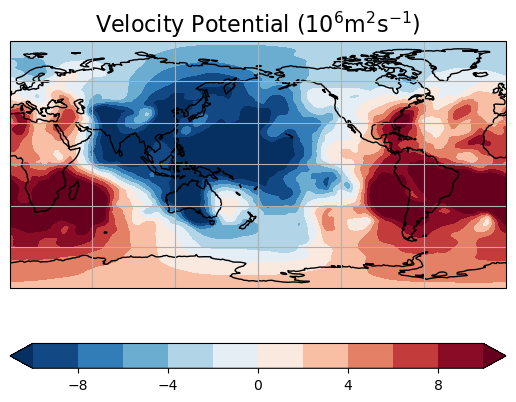

In [6]:
plt.figure()
ax2 = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
clevs = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
fill_vp = ax2.contourf(lon, lat, vp * 1e-06, clevs,
                       transform=ccrs.PlateCarree(), cmap=plt.cm.RdBu_r,
                       extend='both')
ax2.coastlines()
ax2.gridlines()
plt.colorbar(fill_vp, orientation='horizontal')
plt.title('Velocity Potential ($10^6$m$^2$s$^{-1}$)', fontsize=16)
plt.show()